In [1]:
import pandas as pd
import numpy as np


In [2]:
# Import Data Set:

input_data_path: str = "C:/Users/abhishdutta/Desktop/PRD Projects/IBM WatsonX/Generalized Model Development/data/heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(input_data_path)


In [3]:
from src.components.data_ingetion import *
data_ingetion = DataIngetion()
train_data_path, test_data_path = data_ingetion.inititate_data_ingetion(df) #Return the path of Train and test Data

2024-05-08 17:31:46 - LOG - data_ingetion - INFO : The current directory for data Ingetion is C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Initiating data ingetion process...
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Raw data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\raw.csv
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Data ingetion process completed...
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Train data shape: (952, 12)
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Test data shape: (238, 12)
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Train data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\train.csv
2024-05-08 17:31:46 - LOG - data_ingetion - INFO : Test data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Deve

In [4]:
#Give the target variable and the input features to be excluded

target = "target"  #List the target variable
features_to_exclude = ["ST slope"] #List the input features to exclude



In [5]:
from src.components.data_transformation import *

data_transformation_obj = DataTransformation()
train_arr, test_arr, preprocessor_path = data_transformation_obj.inititate_data_transformation(train_data_path, test_data_path, target, features_to_exclude, "hear_disease")


2024-05-08 17:32:08 - LOG - data_transformation - INFO : Initiating data transformation process...
2024-05-08 17:32:08 - LOG - data_transformation - INFO : Data loaded successfully
2024-05-08 17:32:08 - LOG - data_transformation - INFO : Features excluded successfully
2024-05-08 17:32:08 - LOG - data_transformation - INFO : Number columns identified successfully
2024-05-08 17:32:08 - LOG - data_transformation - INFO : Outliers removed!!!
2024-05-08 17:32:08 - LOG - data_transformation - INFO : Outliers removed!!!
c:\users\abhishdutta\desktop\prd projects\ibm watsonx\generalized model development\src\utils.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [6]:
# Get the last column
last_column = train_arr[:, -1]

# Get unique values and their counts
unique_values, counts = np.unique(last_column, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0.0, Count: 326
Value: 1.0, Count: 238


In [7]:
config_path = "C:/Users/abhishdutta/Desktop/PRD Projects/IBM WatsonX/Generalized Model Development/models_classification.json"
with open(config_path, 'r') as f:
    models = json.load(f)

In [8]:
models

{'SVC': 'SVC()',
 'DecisionTree': 'DecisionTreeClassifier(random_state=42)',
 'RandomForest': 'RandomForestClassifier(random_state=42)',
 'GradientBoostingClassification': 'GradientBoostingClassifier(random_state=42)',
 'BaggingClassification': 'BaggingClassifier(random_state=42)'}

In [9]:
for i in range(len(models)):
            model = list(models.values())[i]
            model_flag = list(models.keys())[i]
            # model.fit(X_train, y_train)
            print(model)
            

SVC()
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
GradientBoostingClassifier(random_state=42)
BaggingClassifier(random_state=42)


2024-05-08 17:33:08 - LOG - model_trainer_classification - INFO : Initiating model training process...
2024-05-08 17:33:08 - LOG - model_trainer_classification - INFO : The models are:
2024-05-08 17:33:10 - LOG - utils - INFO : 

2024-05-08 17:33:10 - LOG - utils - INFO : The confusion matrix and classification report for the model: SVC is:
2024-05-08 17:33:10 - LOG - utils - INFO :               precision    recall  f1-score   support

         0.0       0.81      0.82      0.82        79
         1.0       0.81      0.80      0.81        75

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.81      0.81      0.81       154

2024-05-08 17:33:10 - LOG - utils - INFO : 

2024-05-08 17:33:10 - LOG - utils - INFO : 

2024-05-08 17:33:10 - LOG - utils - INFO : The best parameters for the modelSVC are {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1}
2024-05-08 17:33:10 - LOG - utils - INFO : 

2024-05-08 

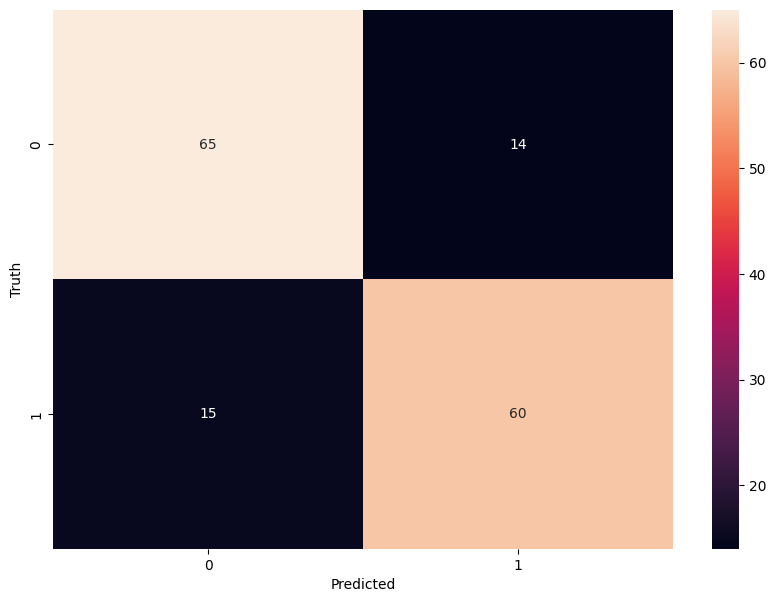

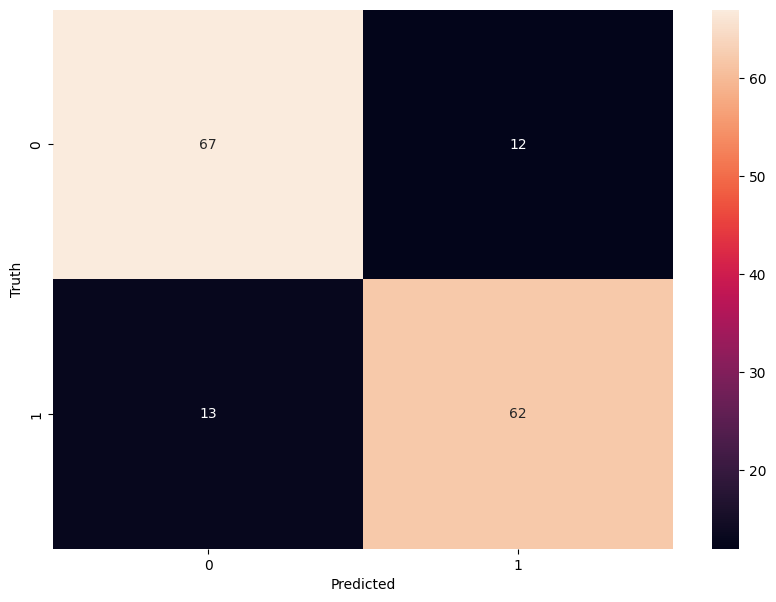

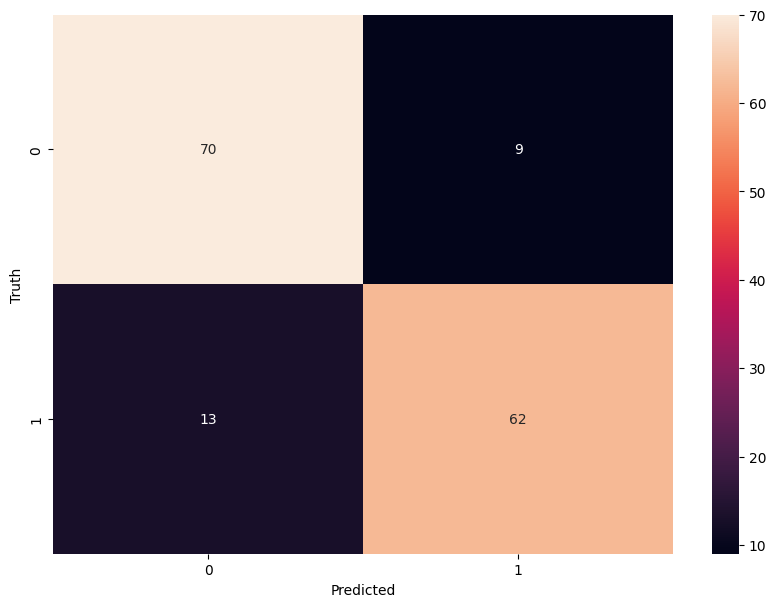

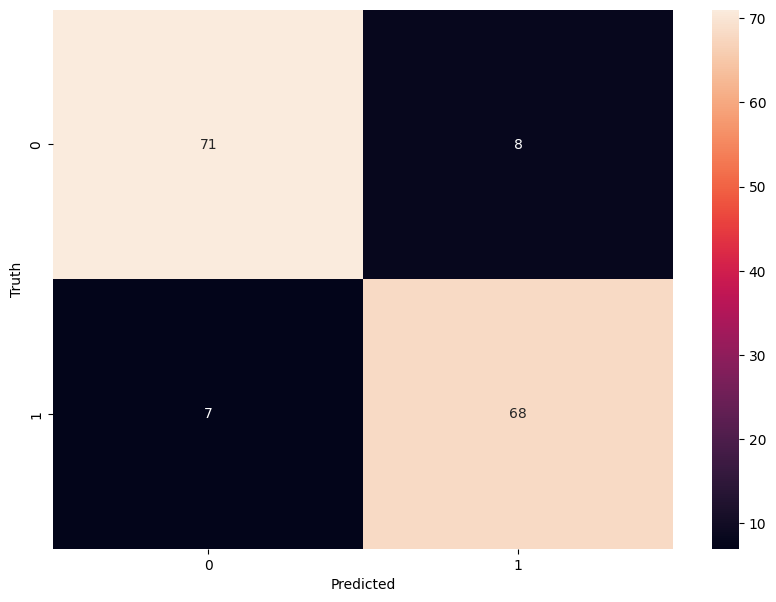

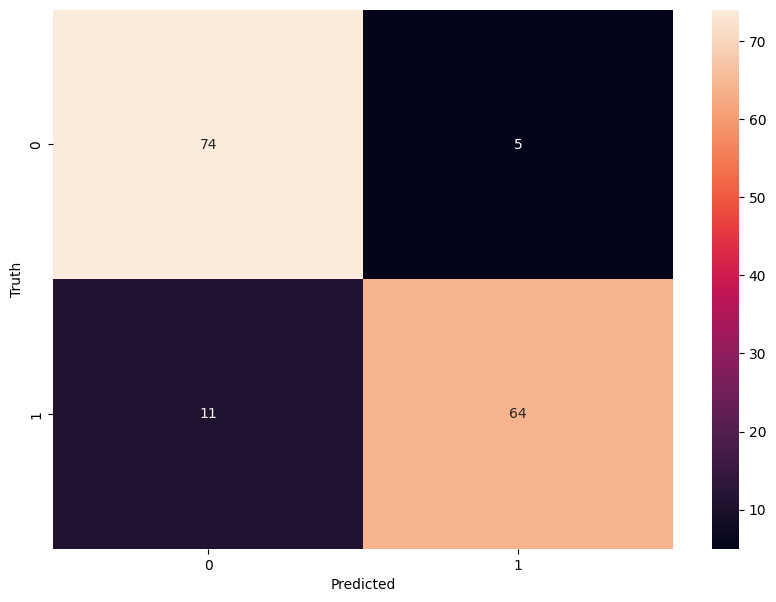

In [10]:
from src.components.model_trainer_classification import *
model_trainer_obj = InitiateModelTraining()
model_trainer_obj.initiate_model_training(train_arr, test_arr, "Heart_Disease")

# Regression Test

Time_taken (min)

In [1]:
# Import Data Set:
import pandas as pd
input_data_path: str = "C:/Users/abhishdutta/Desktop/PRD Projects/IBM WatsonX/Generalized Model Development/data/zomato.csv"
df = pd.read_csv(input_data_path)
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [2]:
df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [3]:
from src.components.data_ingetion import *
data_ingetion = DataIngetion()
train_data_path, test_data_path = data_ingetion.inititate_data_ingetion(df) #Return the path of Train and test Data

2024-05-08 18:46:59 - LOG - data_ingetion - INFO : The current directory for data Ingetion is C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development
2024-05-08 18:46:59 - LOG - data_ingetion - INFO : Initiating data ingetion process...
2024-05-08 18:47:00 - LOG - data_ingetion - INFO : Raw data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\raw.csv
2024-05-08 18:47:00 - LOG - data_ingetion - INFO : Data ingetion process completed...
2024-05-08 18:47:00 - LOG - data_ingetion - INFO : Train data shape: (36467, 21)
2024-05-08 18:47:00 - LOG - data_ingetion - INFO : Test data shape: (9117, 21)
2024-05-08 18:47:00 - LOG - data_ingetion - INFO : Train data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\train.csv
2024-05-08 18:47:01 - LOG - data_ingetion - INFO : Test data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model D

In [4]:
#Give the target variable and the input features to be excluded

target = "Time_taken (min)"  #List the target variable
features_to_exclude = ["Unnamed: 0","ID", "Delivery_person_ID", "Order_Date", "Time_Orderd", "Time_Order_picked" ] #List the input features to exclude



In [5]:
from src.components.data_transformation import *

data_transformation_obj = DataTransformation()
train_arr, test_arr, preprocessor_path = data_transformation_obj.inititate_data_transformation(train_data_path, test_data_path, target, features_to_exclude, user_transformation_name="zomato")


2024-05-08 18:47:01 - LOG - data_transformation - INFO : Initiating data transformation process...
2024-05-08 18:47:01 - LOG - data_transformation - INFO : Data loaded successfully
2024-05-08 18:47:01 - LOG - data_transformation - INFO : Features excluded successfully
2024-05-08 18:47:01 - LOG - data_transformation - INFO : Number columns identified successfully
2024-05-08 18:47:01 - LOG - data_transformation - INFO : Outliers removed!!!
2024-05-08 18:47:01 - LOG - data_transformation - INFO : Outliers removed!!!
c:\users\abhishdutta\desktop\prd projects\ibm watsonx\generalized model development\src\utils.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [6]:
from src.components.model_trainer_regression import *
model_trainer_obj = InitiateModelTraining()
model_trainer_obj.initiate_model_training(train_arr, test_arr, user_model_name="Zomato")

2024-05-08 18:47:02 - LOG - model_trainer_regression - INFO : Initiating model training process...
2024-05-08 18:47:02 - LOG - model_trainer_regression - INFO : ######### C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\models_regression.json
2024-05-08 18:47:02 - LOG - model_trainer_regression - INFO : The models are:
c:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\generalizedmodel\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
2024-05-08 18:47:14 - LOG - utils - INFO : 

2024-05-08 18:47:14 - LOG - utils - INFO : The R-squared and RMSE for the model: Lasso are:
2024-05-08 18:47:14 - LOG - utils - INFO : R-squared: 0.45618865899265026
2024-05-08 18:47:14 - LOG - utils - INFO : 

2024-05-08 18:47:14 - LOG - utils - INFO : 

2024-05-08 18:47:14 - LOG - ut

CustomException: Error occured in python script name [c:\users\abhishdutta\desktop\prd projects\ibm watsonx\generalized model development\src\components\model_trainer_regression.py] line number [102] error message ['ModelTrainerConfig' object has no attribute 'trained_model_path']

In [7]:
config = "C:/Users/abhishdutta/Desktop/PRD Projects/IBM WatsonX/Generalized Model Development/models_regression.json"
with open(config, 'r') as f:
    data_model = json.load(f)
data_model

{'LinearRegression': 'LinearRegression()',
 'Lasso': 'Lasso()',
 'Ridge': 'Ridge()',
 'Elasticnet': 'ElasticNet()',
 'SVR': 'SVR()',
 'DecisionTree': 'DecisionTreeRegressor(random_state=42)',
 'RandomForest': 'RandomForestRegressor(random_state=42)',
 'GradientBoostingRegressor': 'GradientBoostingRegressor(random_state=42)',
 'BaggingRegressor': 'BaggingRegressor(random_state=42)'}

In [10]:
# Use eval to convert strings to Python objects
models = {key: eval(value) for key, value in data_model.items()}

print("The models are:", models)

The models are: {'LinearRegression': LinearRegression(), 'Lasso': Lasso(), 'Ridge': Ridge(), 'Elasticnet': ElasticNet(), 'SVR': SVR(), 'DecisionTree': DecisionTreeRegressor(random_state=42), 'RandomForest': RandomForestRegressor(random_state=42), 'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42), 'BaggingRegressor': BaggingRegressor(random_state=42)}


# Fairness Matrix

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:


# Sample data (replace with your data)
data = pd.DataFrame({
  "feature1": [1, 2, 3, 4, 5],
  "feature2": [11,22,33,11,33],
  "target": [1, 0, 1, 0, 1],
  "sensitive_feature": [0,1,2,3,4]
})

data


,feature1,feature2,target,sensitive_feature
0,1,11,1,0
1,2,22,0,1
2,3,33,1,2
3,4,11,0,3
4,5,33,1,4


In [15]:
# Separate features (X) and target variable (y)
X = data.drop("target", axis=1)
y = data["target"]





In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_test

In [29]:
X_test

,feature1,feature2,sensitive_feature
1,2,22,1


In [17]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
y_test

1    0
Name: target, dtype: int64

In [18]:
y_pred

array([1], dtype=int64)

In [20]:
import numpy as np
def fairness_matrix(true_labels, predicted_labels, sensitive_attribute):
   """
   Generate a fairness matrix.
   Parameters:
       true_labels (array-like): True labels.
       predicted_labels (array-like): Predicted labels.
       sensitive_attribute (array-like): Sensitive attribute values.
   Returns:
       fairness_matrix (2D numpy array): Fairness matrix.
   """
   unique_values = np.unique(sensitive_attribute)
   fairness_matrix = np.zeros((len(unique_values), 2, 2))
   for i, val in enumerate(unique_values):
       idx = sensitive_attribute == val
       true_subset = true_labels[idx]
       pred_subset = predicted_labels[idx]
       TP = np.sum(np.logical_and(pred_subset == 1, true_subset == 1))
       FP = np.sum(np.logical_and(pred_subset == 1, true_subset == 0))
       TN = np.sum(np.logical_and(pred_subset == 0, true_subset == 0))
       FN = np.sum(np.logical_and(pred_subset == 0, true_subset == 1))
       fairness_matrix[i] = np.array([[TP, FP], [FN, TN]])
   return fairness_matrix


In [30]:
# Example usage:
true_labels = np.array(y_pred)
predicted_labels = np.array(y_test)
sensitive_attribute = np.array(X_test["sensitive_feature"])


In [25]:
sensitive_attribute

array([0, 1, 2, 3, 4], dtype=int64)

In [31]:
matrix = fairness_matrix(true_labels, predicted_labels, sensitive_attribute)
print(matrix)

[[[0. 0.]
  [1. 0.]]]


In [1]:
import pandas as pd

# Create a dictionary with your data
data = {
    'Gender': ['Male', 'Female', 'Female'],
    'Married': ['Yes', 'No', 'Yes'],
    'Fraud_risk': ['High', 'Low', 'Medium']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Gender Married Fraud_risk
0    Male     Yes       High
1  Female      No        Low
2  Female     Yes     Medium


In [2]:
from sklearn import preprocessing
categorical_column = ['Gender', 'Married', 'Fraud_risk']

data_encoded = df.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)
        

data_encoded.head()

Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature Married
mapping {'No': 0, 'Yes': 1}
Feature Fraud_risk
mapping {'High': 0, 'Low': 1, 'Medium': 2}


,Gender,Married,Fraud_risk
0,1,1,0
1,0,0,1
2,0,1,2


# Fairness Matrix

In [220]:
import pandas as pd

# Import Data Set:
input_data_path: str = "C:/Users/abhishdutta/Desktop/PRD Projects/IBM WatsonX/Generalized Model Development/data/heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(input_data_path)

In [221]:
from src.components.data_ingetion import *
data_ingetion = DataIngetion()
train_data_path, test_data_path = data_ingetion.inititate_data_ingetion(df) #Return the path of Train and test Data

2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Initiating data ingetion process...
INFO:LOG:Initiating data ingetion process...
2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Raw data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\raw.csv
INFO:LOG:Raw data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\raw.csv
2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Data ingetion process completed...
INFO:LOG:Data ingetion process completed...
2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Train data shape: (952, 12)
INFO:LOG:Train data shape: (952, 12)
2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Test data shape: (238, 12)
INFO:LOG:Test data shape: (238, 12)
2024-05-15 02:39:04 - LOG - data_ingetion - INFO : Train data saved at C:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\artifacts\train.csv
INFO:LOG:Train data saved at C:\U

In [222]:
df_train = pd.read_csv(train_data_path)
df_train

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,63,1,4,130,330,1,2,132,1,1.8,1,1
1,33,1,3,120,298,0,0,185,0,0.0,1,0
2,56,0,4,134,409,0,2,150,1,1.9,2,1
3,77,1,4,125,304,0,2,162,1,0.0,1,1
4,56,1,2,126,166,0,1,140,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,58,1,4,125,300,0,2,171,0,0.0,1,1
948,55,1,2,130,262,0,0,155,0,0.0,1,0
949,61,1,1,134,234,0,0,145,0,2.6,2,1
950,62,0,4,140,268,0,2,160,0,3.6,3,1


In [223]:
#Give the target variable and the input features to be excluded

target = "target"  #List the target variable
# features_to_exclude = ["Unnamed: 0","ID", "Delivery_person_ID", "Order_Date", "Time_Orderd", "Time_Order_picked" ] #List the input features to exclude

# df_train.drop(columns=features_to_exclude, inplace=True)

cat_columns = [col for col in df_train.columns if df_train[col].dtype == "object"]
cat_columns

[]

In [224]:
df_train.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [225]:
# For numeric columns, fill NA values with the mean of the column
for col in df_train.select_dtypes(include=[np.number]).columns:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

# For non-numeric columns, fill NA values with a specific value
for col in df_train.select_dtypes(exclude=[np.number]).columns:
    df_train[col] = df_train[col].fillna('')

In [226]:
df_train.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [227]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize a LabelEncoder
# le = LabelEncoder()

# # Loop through each categorical column
# for column in df_train.columns:
#     # Convert the categorical column to numerical
#     df_train[column] = le.fit_transform(df_train[column])

In [228]:
#ordinal Columns:

ordinal_cols = ["chest pain type", "resting ecg", "ST slope"]

# List of categorical columns
categorical_columns = [ "sex", "fasting blood sugar", "exercise angina"]

In [261]:
# Define the column names
column_names = [
    'Column',
    'Shape of the training dataset',
    'Training data favorable label',
    'Training data unfavorable label',
    'Training data protected attribute',
    'Training data privileged protected attribute',
    'Training data unprivileged protected attribute',
    'Fairness score'
]

# Create an empty DataFrame with the column names
df_details = pd.DataFrame(columns=column_names)
df_details

,Column,Shape of the training dataset,Training data favorable label,Training data unfavorable label,Training data protected attribute,Training data privileged protected attribute,Training data unprivileged protected attribute,Fairness score


In [262]:
# df_details = df_details.iloc[0:0]
# df_details

In [263]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
import pandas as pd



# Initialize a dictionary to hold fairness scores
fairness_scores = {}

# Loop through each categorical column
for column in categorical_columns:
    # Create a BinaryLabelDataset
    binary_label_dataset = BinaryLabelDataset(df=df_train, 
                                              label_names=["target"], 
                                              protected_attribute_names=[column],
                                              favorable_label=1,
                                              unfavorable_label=0)
    
    """
    favorable_label is the label value which is considered beneficial for the individual. For example, in a loan approval scenario, 
    a favorable label could be 1, indicating loan approval. unfavorable_label is the label value which is considered detrimental for the individual. 
    In the same loan approval scenario, an unfavorable label could be 0, indicating loan denial.
    """
    
    # Create a fairness metric object
    metric = BinaryLabelDatasetMetric(binary_label_dataset, 
                                      unprivileged_groups=[{column: 0}], 
                                      privileged_groups=[{column: 1}])
    
    # Compute the fairness score for the column
    fairness_score = metric.mean_difference()
    fairness_scores[column] = fairness_score

    # Create a dictionary with the details
    details = {
        'Column' : [column],
        'Shape of the training dataset': [binary_label_dataset.features.shape],
        'Training data favorable label': [binary_label_dataset.favorable_label],
        'Training data unfavorable label': [binary_label_dataset.unfavorable_label],
        'Training data protected attribute': [binary_label_dataset.protected_attribute_names],
        'Training data privileged protected attribute': [binary_label_dataset.privileged_protected_attributes],
        'Training data unprivileged protected attribute': [binary_label_dataset.unprivileged_protected_attributes],
        'Fairness score': fairness_score  # Use fairness_score here, not fairness_scores
    }
    
    # Appending to the df_details:
    df_details = pd.concat([df_details, pd.DataFrame(details)], ignore_index=True)

# Print the fairness scores
for column, score in fairness_scores.items():
    print(f"Fairness score for {column}: {score}")

Fairness score for sex: -0.34971264367816085
Fairness score for fasting blood sugar: -0.25962712639174584
Fairness score for exercise angina: -0.4883435813365777


C:\Users\abhishdutta\AppData\Local\Temp\ipykernel_16688\3849721137.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_details = pd.concat([df_details, pd.DataFrame(details)], ignore_index=True)


In [264]:
binary_label_dataset

               instance weights features                                    \
                                                                             
                                     age  sex chest pain type resting bp s   
instance names                                                               
0                           1.0     63.0  1.0             4.0        130.0   
1                           1.0     33.0  1.0             3.0        120.0   
2                           1.0     56.0  0.0             4.0        134.0   
3                           1.0     77.0  1.0             4.0        125.0   
4                           1.0     56.0  1.0             2.0        126.0   
...                         ...      ...  ...             ...          ...   
947                         1.0     58.0  1.0             4.0        125.0   
948                         1.0     55.0  1.0             2.0        130.0   
949                         1.0     61.0  1.0             1.0   

# Else, We can do one hot encoding or pd.dummies for the below:

In [265]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Assume df is your DataFrame, and 'outcome' is the column of model predictions
for col in ordinal_cols:
    for value in df_train[col].unique():
        # Create a binary column for the value
        df_train[f'{col}_{value}'] = (df_train[col] == value).astype(int)
        
        # Calculate the fairness metric for the binary column
        dataset = BinaryLabelDataset(df=df_train, label_names=['target'], protected_attribute_names=[f'{col}_{value}'])
        
        display(Markdown(f"#### Training Data Details for {col}_{value}###"))
        print("shape of the training dataset", dataset.features.shape)
        print("Training data favorable label", dataset.favorable_label)
        print("Training data unfavorable label", dataset.unfavorable_label)
        print("Training data protected attribute", dataset.protected_attribute_names)
        print("Training data privileged protected attribute", 
            dataset.privileged_protected_attributes)
        print("Training data unprivileged protected attribute",
            dataset.unprivileged_protected_attributes)
        
        metric = BinaryLabelDatasetMetric(dataset, unprivileged_groups=[{f'{col}_{value}': 0}], privileged_groups=[{f'{col}_{value}': 1}])
        fairness_score = metric.mean_difference()
        
        display(Markdown("#### Preprocessing Bias Details"))
        print(f'Fairness score for {col}_{value}: {fairness_score}')
        
           # Create a dictionary with the details
        column = f"{col}_{value}"
        details = {
            'Column' : [column],
            'Shape of the training dataset': [dataset.features.shape],
            'Training data favorable label': [dataset.favorable_label],
            'Training data unfavorable label': [dataset.unfavorable_label],
            'Training data protected attribute': [dataset.protected_attribute_names],
            'Training data privileged protected attribute': [dataset.privileged_protected_attributes],
            'Training data unprivileged protected attribute': [dataset.unprivileged_protected_attributes],
            'Fairness score': fairness_score  # Use fairness_score here, not fairness_scores
        }
        # print(f"{col}_{value}")
        df_new = pd.DataFrame(details)
        #Appending to the df_details:
        df_details = pd.concat([df_details, df_new], ignore_index=True)

#### Training Data Details for chest pain type_4###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['chest pain type_4']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for chest pain type_4: -0.5116069057104913


#### Training Data Details for chest pain type_3###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['chest pain type_3']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for chest pain type_3: 0.2614921847607448


#### Training Data Details for chest pain type_2###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['chest pain type_2']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for chest pain type_2: 0.4838721645506689


#### Training Data Details for chest pain type_1###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['chest pain type_1']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for chest pain type_1: 0.16192361626660068


#### Training Data Details for resting ecg_2###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['resting ecg_2']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for resting ecg_2: -0.03699421965317928


#### Training Data Details for resting ecg_0###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['resting ecg_0']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for resting ecg_0: 0.10175616101756157


#### Training Data Details for resting ecg_1###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['resting ecg_1']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for resting ecg_1: -0.13641364136413636


#### Training Data Details for ST slope_1###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['ST slope_1']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for ST slope_1: 0.5748633879781421


#### Training Data Details for ST slope_2###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['ST slope_2']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for ST slope_2: -0.5047499060628164


#### Training Data Details for ST slope_3###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['ST slope_3']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for ST slope_3: -0.24005396745088126


#### Training Data Details for ST slope_0###

shape of the training dataset (952, 22)
Training data favorable label 1.0
Training data unfavorable label 0.0
Training data protected attribute ['ST slope_0']
Training data privileged protected attribute [array([1.])]
Training data unprivileged protected attribute [array([0.])]


#### Preprocessing Bias Details

Fairness score for ST slope_0: -0.4773922187171399


In [266]:
df_details.head(20)

,Column,Shape of the training dataset,Training data favorable label,Training data unfavorable label,Training data protected attribute,Training data privileged protected attribute,Training data unprivileged protected attribute,Fairness score
0,sex,"(952, 22)",1.0,0.0,[sex],[[1.0]],[[0.0]],-0.349713
1,fasting blood sugar,"(952, 22)",1.0,0.0,[fasting blood sugar],[[1.0]],[[0.0]],-0.259627
2,exercise angina,"(952, 22)",1.0,0.0,[exercise angina],[[1.0]],[[0.0]],-0.488344
3,chest pain type_4,"(952, 22)",1.0,0.0,[chest pain type_4],[[1.0]],[[0.0]],-0.511607
4,chest pain type_3,"(952, 22)",1.0,0.0,[chest pain type_3],[[1.0]],[[0.0]],0.261492
5,chest pain type_2,"(952, 22)",1.0,0.0,[chest pain type_2],[[1.0]],[[0.0]],0.483872
6,chest pain type_1,"(952, 22)",1.0,0.0,[chest pain type_1],[[1.0]],[[0.0]],0.161924
7,resting ecg_2,"(952, 22)",1.0,0.0,[resting ecg_2],[[1.0]],[[0.0]],-0.036994
8,resting ecg_0,"(952, 22)",1.0,0.0,[resting ecg_0],[[1.0]],[[0.0]],0.101756
9,resting ecg_1,"(952, 22)",1.0,0.0,[resting ecg_1],[[1.0]],[[0.0]],-0.136414


In [210]:
df_details.shape

(23, 8)

# Reweight Algorithm:

In [235]:
df_train_final = df_train.copy()
df_train_final

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,chest pain type_3,chest pain type_2,chest pain type_1,resting ecg_2,resting ecg_0,resting ecg_1,ST slope_1,ST slope_2,ST slope_3,ST slope_0
0,63,1,4,130,330,1,2,132,1,1.8,...,0,0,0,1,0,0,1,0,0,0
1,33,1,3,120,298,0,0,185,0,0.0,...,1,0,0,0,1,0,1,0,0,0
2,56,0,4,134,409,0,2,150,1,1.9,...,0,0,0,1,0,0,0,1,0,0
3,77,1,4,125,304,0,2,162,1,0.0,...,0,0,0,1,0,0,1,0,0,0
4,56,1,2,126,166,0,1,140,0,0.0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,58,1,4,125,300,0,2,171,0,0.0,...,0,0,0,1,0,0,1,0,0,0
948,55,1,2,130,262,0,0,155,0,0.0,...,0,1,0,0,1,0,1,0,0,0
949,61,1,1,134,234,0,0,145,0,2.6,...,0,0,1,0,1,0,0,1,0,0
950,62,0,4,140,268,0,2,160,0,3.6,...,0,0,0,1,0,0,0,0,1,0


In [236]:

columns = df_details.loc[df_details['Fairness score'].abs() > 0.3, 'Column']
columns

0                   sex
2       exercise angina
3     chest pain type_4
5     chest pain type_2
10           ST slope_1
11           ST slope_2
13           ST slope_0
Name: Column, dtype: object

In [239]:
df_train_final.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target', 'chest pain type_4',
       'chest pain type_3', 'chest pain type_2', 'chest pain type_1',
       'resting ecg_2', 'resting ecg_0', 'resting ecg_1', 'ST slope_1',
       'ST slope_2', 'ST slope_3', 'ST slope_0'],
      dtype='object')

In [241]:
# Create a BinaryLabelDataset
binary_label_dataset = BinaryLabelDataset(df=df_train_final, 
                                            label_names=["target"], 
                                            protected_attribute_names=columns.tolist(),
                                            favorable_label=1,
                                            unfavorable_label=0)

In [244]:
binary_label_dataset

               instance weights features                                      \
                                         protected attribute                   
                                     age                 sex chest pain type   
instance names                                                                 
0                           1.0     63.0                 1.0             4.0   
1                           1.0     33.0                 1.0             3.0   
2                           1.0     56.0                 0.0             4.0   
3                           1.0     77.0                 1.0             4.0   
4                           1.0     56.0                 1.0             2.0   
...                         ...      ...                 ...             ...   
947                         1.0     58.0                 1.0             4.0   
948                         1.0     55.0                 1.0             2.0   
949                         1.0     61.0

In [246]:
from aif360.algorithms.preprocessing import Reweighing

# Assume columns is your list of columns
for col in columns:
    unprivileged_groups = [{col: 0}]
    privileged_groups = [{col: 1}]
    
    RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    RW.fit(binary_label_dataset)
    final_binary_label_dataset = RW.transform(binary_label_dataset)

c:\Users\abhishdutta\Desktop\PRD Projects\IBM WatsonX\Generalized Model Development\generalizedmodel\lib\site-packages\aif360\algorithms\preprocessing\reweighing.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  self.w_p_unfav = n_unfav*n_p / (n*n_p_unfav)


# Final Metrix after pre-process

In [252]:
columns

0                   sex
2       exercise angina
3     chest pain type_4
5     chest pain type_2
10           ST slope_1
11           ST slope_2
13           ST slope_0
Name: Column, dtype: object

In [251]:
from aif360.metrics import BinaryLabelDatasetMetric

# Assume columns is your list of columns
for col in columns:
    unprivileged_groups = [{col: 0}]
    privileged_groups = [{col: 1}]
    
    metric_orig_train = BinaryLabelDatasetMetric(final_binary_label_dataset, 
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)

    print(f"Difference in mean outcomes between unprivileged and privileged groups for {col} = {metric_orig_train.mean_difference()}")

Difference in mean outcomes between unprivileged and privileged groups for sex = 0.04527530908334543
Difference in mean outcomes between unprivileged and privileged groups for exercise angina = 0.2770460879308977
Difference in mean outcomes between unprivileged and privileged groups for chest pain type_4 = 0.10801345602453039
Difference in mean outcomes between unprivileged and privileged groups for chest pain type_2 = -0.11629214407430488
Difference in mean outcomes between unprivileged and privileged groups for ST slope_1 = -0.010894899245517231
Difference in mean outcomes between unprivileged and privileged groups for ST slope_2 = -0.001119460655889859
Difference in mean outcomes between unprivileged and privileged groups for ST slope_0 = -0.47649216924622495


1. A positive value means that the privileged group has a higher mean outcome than the unprivileged group. This could indicate a bias in favor of the privileged group.
2. A negative value means that the unprivileged group has a higher mean outcome than the privileged group. This could indicate a bias in favor of the unprivileged group.
3. A value close to zero means that the mean outcomes for the two groups are similar. This could indicate that the column is fair with respect to the groups

-- For example, for the column sex, the difference in mean outcomes is 0.04527530908334543. This means that the mean outcome for the privileged group is slightly higher than for the unprivileged group.

-- For the column ST slope_0, the difference in mean outcomes is -0.47649216924622495. This means that the mean outcome for the unprivileged group is significantly higher than for the privileged group. This could indicate a bias in favor of the unprivileged group for this column.

In [277]:
#Previous:
filtered_df = df_details[df_details['Column'].isin(columns)][['Column', 'Fairness score']]
filtered_df

,Column,Fairness score
0,sex,-0.349713
2,exercise angina,-0.488344
3,chest pain type_4,-0.511607
5,chest pain type_2,0.483872
10,ST slope_1,0.574863
11,ST slope_2,-0.504750
13,ST slope_0,-0.477392
